In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [35]:
file='./Alarms.csv'
df=pd.read_csv(file)
df.head()

,EquipmentMasterAlarmAuditTrailId,EquipmentMasterId,EquipmentName,AlarmLogDateTime,AlarmEvent,AlarmType,AckUserId,AckDatetime,AckComments,ReviewedApprovedStatus,EmailStatus,SMSStatus,AlarmInfo
0,24687,2,CQ.INC.001,2024-01-08 12:00:00.000,COMPRESSOR CHANGEOVER,N,admin,2024-01-24 09:44:14.430,Alarm Aknoledg to perform Software test,0,1,3,~Temperature~SV=32.5 ~PV1=0
1,24688,2,CQ.INC.001,2024-01-09 12:00:00.000,COMPRESSOR CHANGEOVER,N,admin,2024-01-24 09:44:14.430,Alarm Aknoledg to perform Software test,0,1,3,~Temperature~SV=32.5 ~PV1=0
2,24689,2,CQ.INC.001,2024-01-10 12:00:00.000,COMPRESSOR CHANGEOVER,N,admin,2024-01-24 09:44:14.430,Alarm Aknoledg to perform Software test,0,1,3,~Temperature~SV=32.5 ~PV1=0
3,24690,2,CQ.INC.001,2024-01-11 12:00:00.000,COMPRESSOR CHANGEOVER,N,admin,2024-01-24 09:44:14.430,Alarm Aknoledg to perform Software test,0,1,3,~Temperature~SV=32.5 ~PV1=0
4,24691,2,CQ.INC.001,2024-01-12 12:00:00.000,COMPRESSOR CHANGEOVER,N,admin,2024-01-24 09:44:14.433,Alarm Aknoledg to perform Software test,0,1,3,~Temperature~SV=32.5 ~PV1=0


# **PREPOCESSING**


In [36]:
#getting some infos
df.info()
print((df['AlarmEvent'].unique()))
print(len(df['AlarmEvent'].unique()))
print((df['AlarmInfo'].unique()))
print(len(df['AlarmInfo'].unique()))
print((df['EquipmentMasterId'].unique()))
print(len(df['EquipmentMasterId'].unique()))
print((df['EquipmentName'].unique()))
print(len(df['EquipmentName'].unique()))
print((df['AlarmType'].unique()))
print(len(df['AlarmType'].unique()))
print((df['ReviewedApprovedStatus'].unique()))
print(len(df['ReviewedApprovedStatus'].unique()))
print((df['EmailStatus'].unique()))
print(len(df['EmailStatus'].unique()))
print((df['SMSStatus'].unique()))
print(len(df['SMSStatus'].unique()))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19376 entries, 0 to 19375
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   EquipmentMasterAlarmAuditTrailId  19376 non-null  int64 
 1   EquipmentMasterId                 19376 non-null  int64 
 2   EquipmentName                     19376 non-null  object
 3   AlarmLogDateTime                  19376 non-null  object
 4   AlarmEvent                        19376 non-null  object
 5   AlarmType                         19376 non-null  object
 6   AckUserId                         5968 non-null   object
 7   AckDatetime                       5968 non-null   object
 8   AckComments                       5961 non-null   object
 9   ReviewedApprovedStatus            19376 non-null  int64 
 10  EmailStatus                       19376 non-null  int64 
 11  SMSStatus                         19376 non-null  int64 
 12  AlarmInfo         

## Les variables ReviewedApprovedStatus et SMSStatus ne présentent aucune variation, elles ne sont donc pas utiles pour la prédiction. Quant à EmailStatus, il s’agit d’une conséquence et non d’une cause influençant la prédiction, nous le supprimons également.

In [37]:
df = df.drop(['ReviewedApprovedStatus', 'EmailStatus', 'SMSStatus'], axis=1)
df.head()

,EquipmentMasterAlarmAuditTrailId,EquipmentMasterId,EquipmentName,AlarmLogDateTime,AlarmEvent,AlarmType,AckUserId,AckDatetime,AckComments,AlarmInfo
0,24687,2,CQ.INC.001,2024-01-08 12:00:00.000,COMPRESSOR CHANGEOVER,N,admin,2024-01-24 09:44:14.430,Alarm Aknoledg to perform Software test,~Temperature~SV=32.5 ~PV1=0
1,24688,2,CQ.INC.001,2024-01-09 12:00:00.000,COMPRESSOR CHANGEOVER,N,admin,2024-01-24 09:44:14.430,Alarm Aknoledg to perform Software test,~Temperature~SV=32.5 ~PV1=0
2,24689,2,CQ.INC.001,2024-01-10 12:00:00.000,COMPRESSOR CHANGEOVER,N,admin,2024-01-24 09:44:14.430,Alarm Aknoledg to perform Software test,~Temperature~SV=32.5 ~PV1=0
3,24690,2,CQ.INC.001,2024-01-11 12:00:00.000,COMPRESSOR CHANGEOVER,N,admin,2024-01-24 09:44:14.430,Alarm Aknoledg to perform Software test,~Temperature~SV=32.5 ~PV1=0
4,24691,2,CQ.INC.001,2024-01-12 12:00:00.000,COMPRESSOR CHANGEOVER,N,admin,2024-01-24 09:44:14.433,Alarm Aknoledg to perform Software test,~Temperature~SV=32.5 ~PV1=0


In [38]:
#afficher les event de type A

filtered_df_type = df[df['AlarmType'] == 'A']

print(filtered_df_type[['AlarmEvent','EquipmentName','AlarmInfo']].head(10))
print((filtered_df_type['AlarmEvent'].unique()))
print(len(filtered_df_type['AlarmEvent'].unique()))

            AlarmEvent EquipmentName  \
35    TEMP 4 LOW ALARM    CQ.INC.001   
41    TEMP 2 LOW ALARM    CQ.INC.001   
42    TEMP 3 LOW ALARM    CQ.INC.001   
43    TEMP 6 LOW ALARM    CQ.INC.001   
44    TEMP 7 LOW ALARM    CQ.INC.001   
45    TEMP 8 LOW ALARM    CQ.INC.001   
82   TEMP 4 HIGH ALARM    CQ.INC.001   
101   TEMP 1 LOW ALARM    CQ.INC.001   
102   TEMP 2 LOW ALARM    CQ.INC.001   
103   TEMP 3 LOW ALARM    CQ.INC.001   

                                     AlarmInfo  
35   ~Temperature~SV=32.5      ~PV1=30.9        
41   ~Temperature~SV=32.5      ~PV1=31.4        
42   ~Temperature~SV=32.5      ~PV1=32.3        
43   ~Temperature~SV=32.5      ~PV1=32.1        
44   ~Temperature~SV=32.5      ~PV1=31.8        
45   ~Temperature~SV=32.5      ~PV1=31.1        
82   ~Temperature~SV=32.5      ~PV1=74.4        
101  ~Temperature~SV=32.5      ~PV1=-99.9       
102  ~Temperature~SV=32.5      ~PV1=32.1        
103  ~Temperature~SV=32.5      ~PV1=32.4        
['TEMP 4 LOW ALARM' 

In [39]:
#afficher les event de type N

filtered_df_type = df[df['AlarmType'] == 'N']


print(filtered_df_type[['AlarmEvent','EquipmentName','AlarmInfo']].head(10))
print((filtered_df_type['AlarmEvent'].unique()))
print(len(filtered_df_type['AlarmEvent'].unique()))

              AlarmEvent EquipmentName  \
0  COMPRESSOR CHANGEOVER    CQ.INC.001   
1  COMPRESSOR CHANGEOVER    CQ.INC.001   
2  COMPRESSOR CHANGEOVER    CQ.INC.001   
3  COMPRESSOR CHANGEOVER    CQ.INC.001   
4  COMPRESSOR CHANGEOVER    CQ.INC.001   
5  COMPRESSOR CHANGEOVER    CQ.INC.001   
6             MAINS FAIL    CQ.INC.001   
7           MAINS RESUME    CQ.INC.001   
8             MAINS FAIL    CQ.INC.001   
9           MAINS RESUME    CQ.INC.001   

                                   AlarmInfo  
0  ~Temperature~SV=32.5      ~PV1=0           
1  ~Temperature~SV=32.5      ~PV1=0           
2  ~Temperature~SV=32.5      ~PV1=0           
3  ~Temperature~SV=32.5      ~PV1=0           
4  ~Temperature~SV=32.5      ~PV1=0           
5  ~Temperature~SV=32.5      ~PV1=0           
6  ~Temperature~SV=32.5      ~PV1=0           
7  ~Temperature~SV=32.5      ~PV1=0           
8  ~Temperature~SV=32.5      ~PV1=0           
9  ~Temperature~SV=32.5      ~PV1=0           
['COMPRESSOR CHANGEO

## On remarque que les alarmes importantes sont de type A, tandis que les alarmes de type N sont uniquement informatives. Par conséquent, nous supprimons ces dernières.

In [40]:
df = df[df['AlarmType'] != 'N']
df.info()
print(df['AlarmType'].unique())

<class 'pandas.core.frame.DataFrame'>
Index: 7721 entries, 35 to 19375
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   EquipmentMasterAlarmAuditTrailId  7721 non-null   int64 
 1   EquipmentMasterId                 7721 non-null   int64 
 2   EquipmentName                     7721 non-null   object
 3   AlarmLogDateTime                  7721 non-null   object
 4   AlarmEvent                        7721 non-null   object
 5   AlarmType                         7721 non-null   object
 6   AckUserId                         3171 non-null   object
 7   AckDatetime                       3171 non-null   object
 8   AckComments                       3171 non-null   object
 9   AlarmInfo                         6274 non-null   object
dtypes: int64(2), object(8)
memory usage: 663.5+ KB
['A']


## L’information d’acknowledgment (Ack) n’est pas utile pour prédire une alarme future, car elle est générée après l’occurrence de l’alarme. Nous supprimons donc les trois colonnes liées à Ack. Concernant AckComment, 90 % des valeurs correspondent à des tests, ce qui ne fournit aucun commentaire exploitable pour la prédiction.

In [41]:
df.drop(['AckUserId','AckDatetime','AckComments'],inplace=True,axis=1)
df.head()

,EquipmentMasterAlarmAuditTrailId,EquipmentMasterId,EquipmentName,AlarmLogDateTime,AlarmEvent,AlarmType,AlarmInfo
35,24722,2,CQ.INC.001,2024-01-22 15:41:00.000,TEMP 4 LOW ALARM,A,~Temperature~SV=32.5 ~PV1=30.9
41,24728,2,CQ.INC.001,2024-01-23 11:38:00.000,TEMP 2 LOW ALARM,A,~Temperature~SV=32.5 ~PV1=31.4
42,24729,2,CQ.INC.001,2024-01-23 11:38:00.000,TEMP 3 LOW ALARM,A,~Temperature~SV=32.5 ~PV1=32.3
43,24730,2,CQ.INC.001,2024-01-23 11:38:00.000,TEMP 6 LOW ALARM,A,~Temperature~SV=32.5 ~PV1=32.1
44,24731,2,CQ.INC.001,2024-01-23 11:38:00.000,TEMP 7 LOW ALARM,A,~Temperature~SV=32.5 ~PV1=31.8


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7721 entries, 35 to 19375
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   EquipmentMasterAlarmAuditTrailId  7721 non-null   int64 
 1   EquipmentMasterId                 7721 non-null   int64 
 2   EquipmentName                     7721 non-null   object
 3   AlarmLogDateTime                  7721 non-null   object
 4   AlarmEvent                        7721 non-null   object
 5   AlarmType                         7721 non-null   object
 6   AlarmInfo                         6274 non-null   object
dtypes: int64(2), object(5)
memory usage: 740.6+ KB


## Passons maintenant à l’analyse de la variable alarmLogDateTime.

In [43]:
# extraire le jour, le mois, l'années et l'heure de l'alarme
df['AlarmLogDateTime'] = pd.to_datetime(df['AlarmLogDateTime'])
df['Jour'] = df['AlarmLogDateTime'].dt.day
df['Mois'] = df['AlarmLogDateTime'].dt.month
df['Année'] = df['AlarmLogDateTime'].dt.year
df['Heure'] = df['AlarmLogDateTime'].dt.hour
df.head()

,EquipmentMasterAlarmAuditTrailId,EquipmentMasterId,EquipmentName,AlarmLogDateTime,AlarmEvent,AlarmType,AlarmInfo,Jour,Mois,Année,Heure
35,24722,2,CQ.INC.001,2024-01-22 15:41:00,TEMP 4 LOW ALARM,A,~Temperature~SV=32.5 ~PV1=30.9,22,1,2024,15
41,24728,2,CQ.INC.001,2024-01-23 11:38:00,TEMP 2 LOW ALARM,A,~Temperature~SV=32.5 ~PV1=31.4,23,1,2024,11
42,24729,2,CQ.INC.001,2024-01-23 11:38:00,TEMP 3 LOW ALARM,A,~Temperature~SV=32.5 ~PV1=32.3,23,1,2024,11
43,24730,2,CQ.INC.001,2024-01-23 11:38:00,TEMP 6 LOW ALARM,A,~Temperature~SV=32.5 ~PV1=32.1,23,1,2024,11
44,24731,2,CQ.INC.001,2024-01-23 11:38:00,TEMP 7 LOW ALARM,A,~Temperature~SV=32.5 ~PV1=31.8,23,1,2024,11


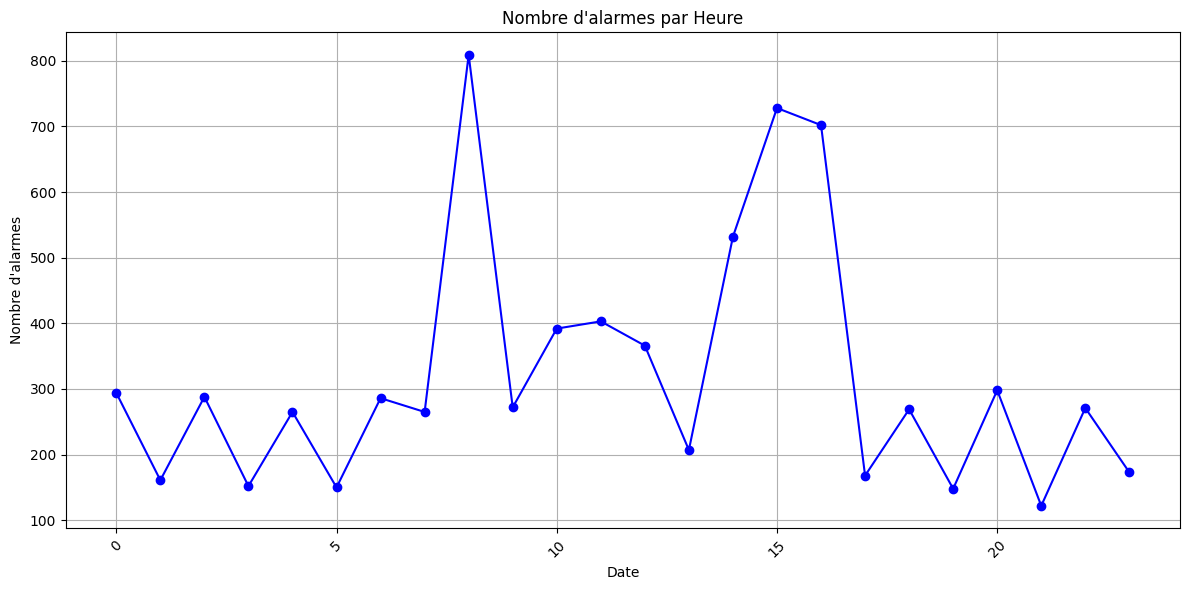

In [44]:
#ploter le développement des alarm en term de temps
alarms_par_Heure = df.groupby('Heure').size()

# Line plot
plt.figure(figsize=(12, 6))
plt.plot(alarms_par_Heure.index, alarms_par_Heure.values, marker='o', color='blue')
plt.title("Nombre d'alarmes par Heure")
plt.xlabel("Date")
plt.ylabel("Nombre d'alarmes")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


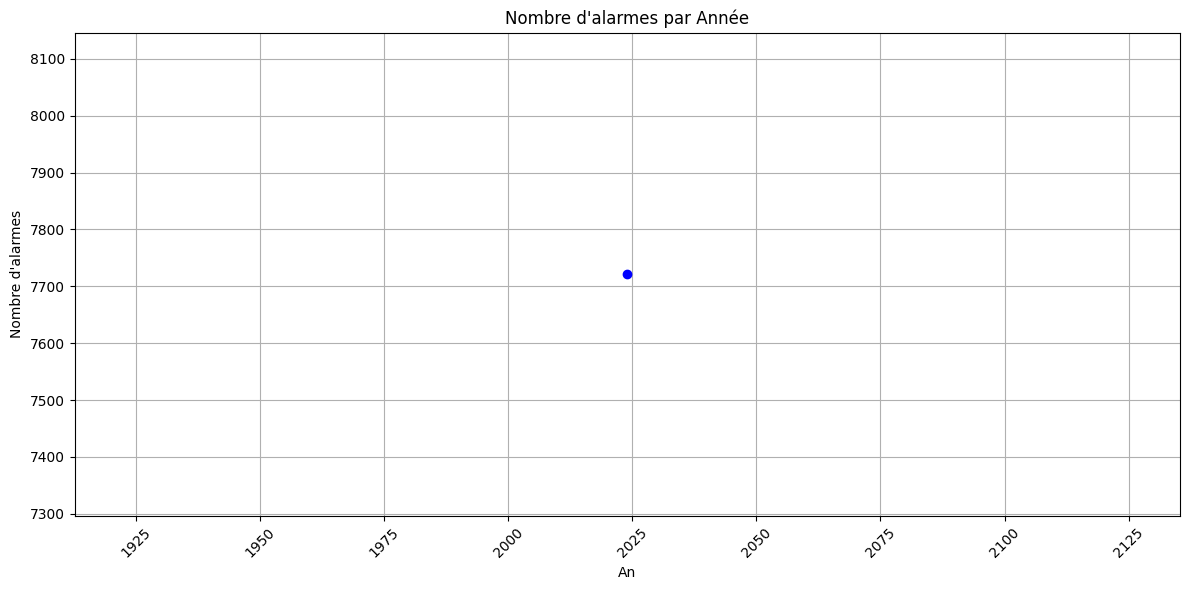

In [45]:
#ploter le développement des alarm en term de temps
alarms_par_Année = df.groupby('Année').size()

# Line plot
plt.figure(figsize=(12, 6))
plt.plot(alarms_par_Année.index, alarms_par_Année.values, marker='o', color='blue')
plt.title("Nombre d'alarmes par Année")
plt.xlabel("An")
plt.ylabel("Nombre d'alarmes")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


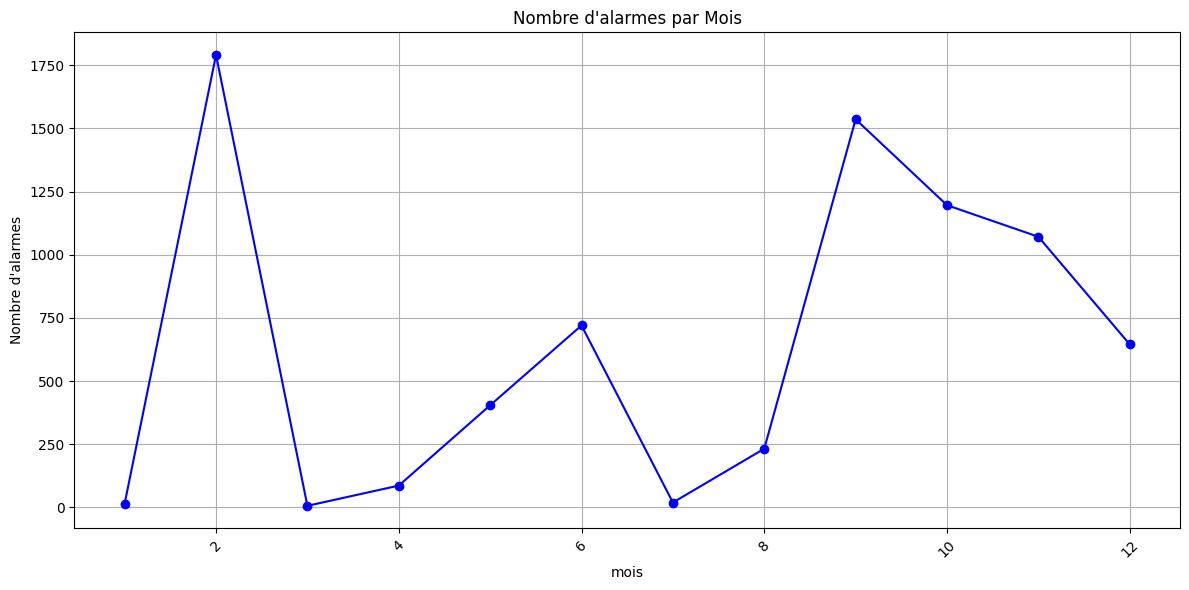

In [46]:
#ploter le développement des alarm en term de temps
alarms_par_Mois = df.groupby('Mois').size()

# Line plot
plt.figure(figsize=(12, 6))
plt.plot(alarms_par_Mois.index, alarms_par_Mois.values, marker='o', color='blue')
plt.title("Nombre d'alarmes par Mois")
plt.xlabel("mois")
plt.ylabel("Nombre d'alarmes")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


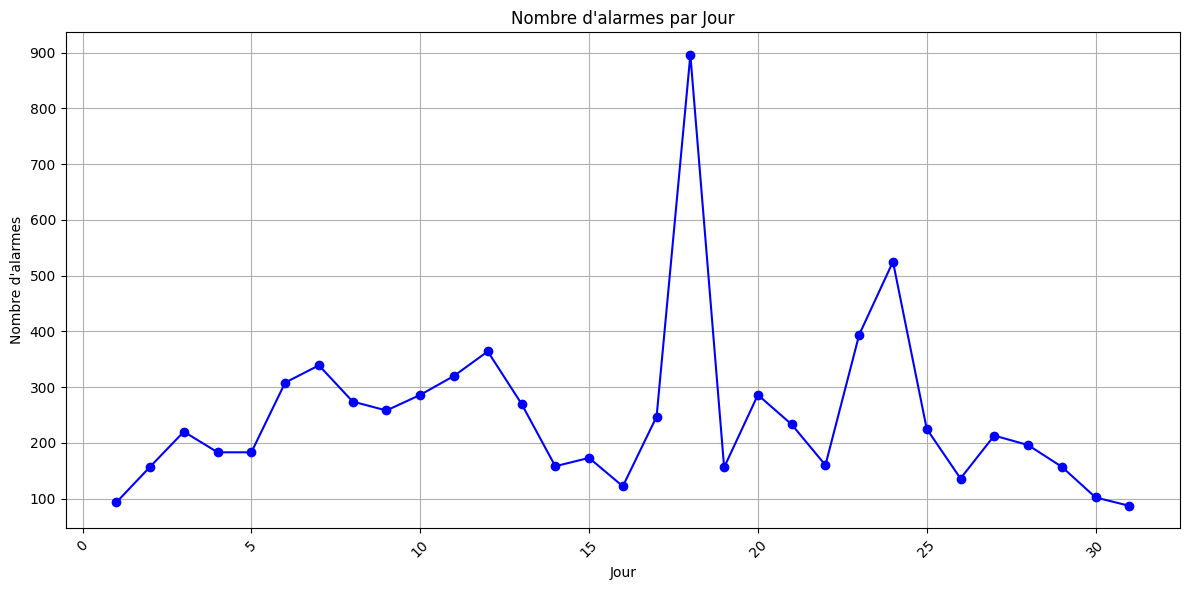

In [47]:
#ploter le développement des alarm en term de temps
alarms_par_Mois = df.groupby('Jour').size()

# Line plot
plt.figure(figsize=(12, 6))
plt.plot(alarms_par_Mois.index, alarms_par_Mois.values, marker='o', color='blue')
plt.title("Nombre d'alarmes par Jour")
plt.xlabel("Jour")
plt.ylabel("Nombre d'alarmes")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## On remarque que notre série est irrégulière, ce qui ne permet pas d’appliquer des modèles de prévision de séries temporelles tels qu’ARMA. Pour contourner ce problème, nous créons une variable appelée delta time, qui correspond au temps avant le prochain événement.

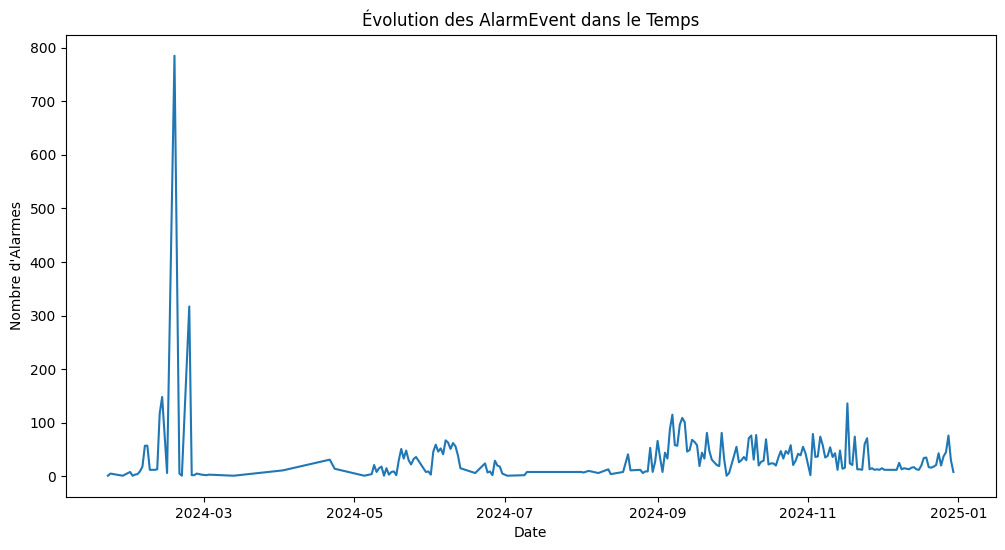

In [48]:

daily_counts = df.groupby(df['AlarmLogDateTime'].dt.date).size()


plt.figure(figsize=(12, 6))
daily_counts.plot(kind='line')
plt.title("Évolution des AlarmEvent dans le Temps")
plt.xlabel("Date")
plt.ylabel("Nombre d'Alarmes")
plt.show()

## Nous créons notre variable cible (target), le delta time, exprimé en différentes unités de temps (minutes et heures). Ensuite, nous choisissons l’unité la plus pertinente pour la prédiction.

In [50]:

df['delta_time'] = df['AlarmLogDateTime'].shift(-1) - df['AlarmLogDateTime']
df['delta_minutes'] = df['delta_time'].dt.total_seconds() / 60
df['delta_heure'] = df['delta_time'].dt.total_seconds() / 3600
df.head()

,EquipmentMasterAlarmAuditTrailId,EquipmentMasterId,EquipmentName,AlarmLogDateTime,AlarmEvent,AlarmType,AlarmInfo,Jour,Mois,Année,Heure,delta_time,delta_minutes,delta_heure
35,24722,2,CQ.INC.001,2024-01-22 15:41:00,TEMP 4 LOW ALARM,A,~Temperature~SV=32.5 ~PV1=30.9,22,1,2024,15,0 days 19:57:00,1197.0,19.95
41,24728,2,CQ.INC.001,2024-01-23 11:38:00,TEMP 2 LOW ALARM,A,~Temperature~SV=32.5 ~PV1=31.4,23,1,2024,11,0 days 00:00:00,0.0,0.00
42,24729,2,CQ.INC.001,2024-01-23 11:38:00,TEMP 3 LOW ALARM,A,~Temperature~SV=32.5 ~PV1=32.3,23,1,2024,11,0 days 00:00:00,0.0,0.00
43,24730,2,CQ.INC.001,2024-01-23 11:38:00,TEMP 6 LOW ALARM,A,~Temperature~SV=32.5 ~PV1=32.1,23,1,2024,11,0 days 00:00:00,0.0,0.00
44,24731,2,CQ.INC.001,2024-01-23 11:38:00,TEMP 7 LOW ALARM,A,~Temperature~SV=32.5 ~PV1=31.8,23,1,2024,11,0 days 00:00:00,0.0,0.00


## Traçons le delta time en fonction des identifiants afin d’observer la variation des valeurs selon les enregistrements.

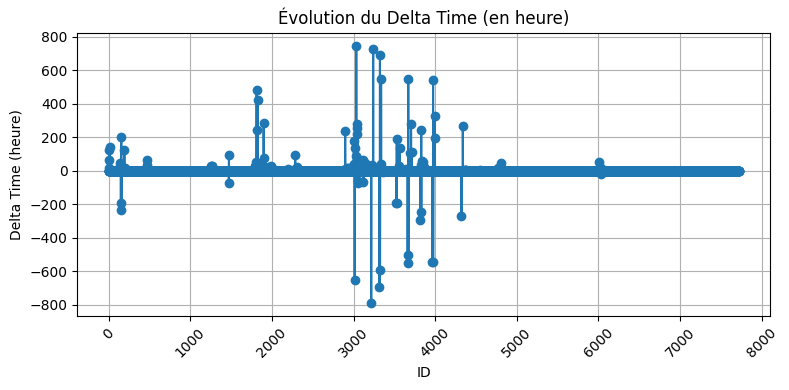

In [51]:
#reénitialiser les id pour avoir de 0 a n
df['EquipmentMasterAlarmAuditTrailId'] = range(1, len(df) + 1)
#ploter delta heur de chaque alarm
plt.figure(figsize=(8, 4))
plt.plot(df['EquipmentMasterAlarmAuditTrailId'], df['delta_heure'], marker='o', linestyle='-')
plt.title("Évolution du Delta Time (en heure)")
plt.xlabel("ID")
plt.ylabel("Delta Time (heure)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [52]:
valeurs_negatives = df[df['delta_heure'] < 0]['EquipmentMasterAlarmAuditTrailId']

# Afficher
laval_1 = df[df['EquipmentMasterAlarmAuditTrailId'] ==  148]['AlarmLogDateTime']
laval_2 = df[df['EquipmentMasterAlarmAuditTrailId'] ==  149]['AlarmLogDateTime']
laval_3 = df[df['EquipmentMasterAlarmAuditTrailId'] ==  150]['AlarmLogDateTime']
print(laval_1)
print(laval_2)
print(laval_3)
print("len",len(valeurs_negatives))
print(valeurs_negatives)



467   2024-02-11 16:00:00
Name: AlarmLogDateTime, dtype: datetime64[ns]
468   2024-02-11 16:00:00
Name: AlarmLogDateTime, dtype: datetime64[ns]
469   2024-02-01 23:25:00
Name: AlarmLogDateTime, dtype: datetime64[ns]
len 124
468       149
480       156
2350     1472
3031     1841
4155     2258
         ... 
17036    6978
18366    7334
18538    7402
18895    7515
19227    7664
Name: EquipmentMasterAlarmAuditTrailId, Length: 124, dtype: int64


## On remarque qu’il existe des valeurs négatives, car les enregistrements ne sont pas triés chronologiquement.

In [53]:
df.sort_values(by='AlarmLogDateTime', inplace=True)
df = df.reset_index(drop=True)

#recalculer delta
df['delta_time'] = df['AlarmLogDateTime'].shift(-1) - df['AlarmLogDateTime']
df['delta_minutes'] = df['delta_time'].dt.total_seconds() / 60
df['delta_heure'] = df['delta_time'].dt.total_seconds() / 3600
df.head()


,EquipmentMasterAlarmAuditTrailId,EquipmentMasterId,EquipmentName,AlarmLogDateTime,AlarmEvent,AlarmType,AlarmInfo,Jour,Mois,Année,Heure,delta_time,delta_minutes,delta_heure
0,1,2,CQ.INC.001,2024-01-22 15:41:00,TEMP 4 LOW ALARM,A,~Temperature~SV=32.5 ~PV1=30.9,22,1,2024,15,0 days 19:57:00,1197.0,19.95
1,2,2,CQ.INC.001,2024-01-23 11:38:00,TEMP 2 LOW ALARM,A,~Temperature~SV=32.5 ~PV1=31.4,23,1,2024,11,0 days 00:00:00,0.0,0.00
2,3,2,CQ.INC.001,2024-01-23 11:38:00,TEMP 3 LOW ALARM,A,~Temperature~SV=32.5 ~PV1=32.3,23,1,2024,11,0 days 00:00:00,0.0,0.00
3,4,2,CQ.INC.001,2024-01-23 11:38:00,TEMP 6 LOW ALARM,A,~Temperature~SV=32.5 ~PV1=32.1,23,1,2024,11,0 days 00:00:00,0.0,0.00
4,5,2,CQ.INC.001,2024-01-23 11:38:00,TEMP 7 LOW ALARM,A,~Temperature~SV=32.5 ~PV1=31.8,23,1,2024,11,0 days 00:00:00,0.0,0.00


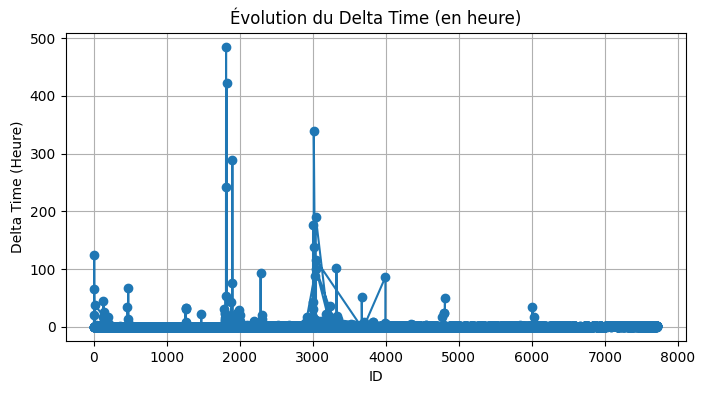

In [54]:
plt.figure(figsize=(8, 4))
plt.plot(df['EquipmentMasterAlarmAuditTrailId'], df['delta_heure'], marker='o', linestyle='-')
plt.title("Évolution du Delta Time (en heure)")
plt.xlabel("ID")
plt.ylabel("Delta Time (Heure)")
plt.grid(True)


plt.show()

## On remarque que la plupart des valeurs de delta time se situent entre 0 et 100. Il reste donc à décider si les valeurs supérieures à 200 doivent être considérées comme des outliers.

In [57]:
up_200 = df[df['delta_heure']>200]['EquipmentMasterAlarmAuditTrailId']
print('up to 200:',len(up_200))



eq_00 = df[df['delta_heure']<1]['EquipmentMasterAlarmAuditTrailId']
print('nombre de delta time inférieur à une heure',len(eq_00))



up to 200: 5
nombre de delta time inférieur à une heure 6217


## on remarque que 5 suelement (donc considérer outliers)

## 85 % des données présentent un delta time inférieur à une heure. Par conséquent, nous choisissons d’exprimer le delta time en minutes.

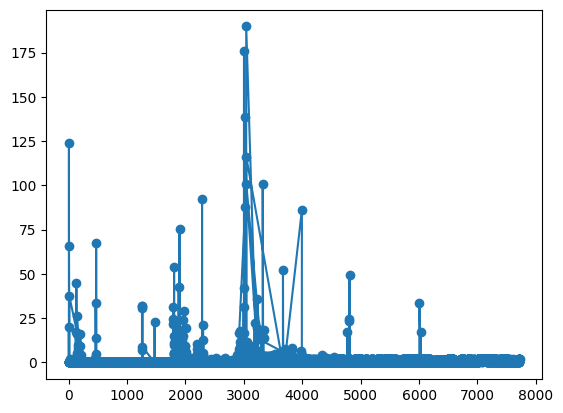

In [59]:
df = df[df['delta_heure'] <= 200]
plt.plot(df['EquipmentMasterAlarmAuditTrailId'], df['delta_heure'], marker='o', linestyle='-')

## Nous créons une variable elapsed_time, qui représente le temps écoulé depuis la dernière alarme. Cette feature aidera le modèle lors de l’entraînement.

In [61]:
df['elapsed_time'] = df['AlarmLogDateTime'] - df['AlarmLogDateTime'].shift(1)
df['elapsed_time'] = df['elapsed_time'].dt.total_seconds() / 3600
df.head()

/tmp/ipython-input-771254135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['elapsed_time'] = df['AlarmLogDateTime'] - df['AlarmLogDateTime'].shift(1)
/tmp/ipython-input-771254135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['elapsed_time'] = df['elapsed_time'].dt.total_seconds() / 3600


,EquipmentMasterAlarmAuditTrailId,EquipmentMasterId,EquipmentName,AlarmLogDateTime,AlarmEvent,AlarmType,AlarmInfo,Jour,Mois,Année,Heure,delta_time,delta_minutes,delta_heure,elapsed_time
0,1,2,CQ.INC.001,2024-01-22 15:41:00,TEMP 4 LOW ALARM,A,~Temperature~SV=32.5 ~PV1=30.9,22,1,2024,15,0 days 19:57:00,1197.0,19.95,NaN
1,2,2,CQ.INC.001,2024-01-23 11:38:00,TEMP 2 LOW ALARM,A,~Temperature~SV=32.5 ~PV1=31.4,23,1,2024,11,0 days 00:00:00,0.0,0.00,19.95
2,3,2,CQ.INC.001,2024-01-23 11:38:00,TEMP 3 LOW ALARM,A,~Temperature~SV=32.5 ~PV1=32.3,23,1,2024,11,0 days 00:00:00,0.0,0.00,0.00
3,4,2,CQ.INC.001,2024-01-23 11:38:00,TEMP 6 LOW ALARM,A,~Temperature~SV=32.5 ~PV1=32.1,23,1,2024,11,0 days 00:00:00,0.0,0.00,0.00
4,5,2,CQ.INC.001,2024-01-23 11:38:00,TEMP 7 LOW ALARM,A,~Temperature~SV=32.5 ~PV1=31.8,23,1,2024,11,0 days 00:00:00,0.0,0.00,0.00


In [62]:
print(df[df['EquipmentMasterId'] == 13]["EquipmentName"].unique())
print(df[df['EquipmentMasterId'] == 12]["EquipmentName"].unique())

['CQ.CHF.001']
['CQ.CHF.001']


## On remarque que les identifiants 12 et 13 correspondent au même équipement.

In [63]:
df['EquipmentMasterId'] = df['EquipmentMasterId'].replace(13, 12)

/tmp/ipython-input-2508860790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EquipmentMasterId'] = df['EquipmentMasterId'].replace(13, 12)


In [64]:
#pour savoir chaque équipement a quoi comme alarmevent

pd.set_option("display.max_rows", None)   # afficher toutes les lignes
pd.set_option("display.max_columns", None) # afficher toutes les colonnes
pd.set_option("display.width", None)      # pas de coupure de largeur
pd.set_option("display.max_colwidth", None) # afficher tout le texte des cellules


table = pd.crosstab(df["EquipmentName"], df["AlarmEvent"])
print(table)

AlarmEvent     COMMUNICATION FAILURE  RH 1 HIGH ALARM  RH 1 LOW ALARM  \
EquipmentName                                                           
CQ.CHF.001                         6                0               0   
CQ.CHS.001                       242               19               5   
CQ.CHS.002                       223               13               1   
CQ.CHS.003                        77               18               3   
CQ.CHS.004                        10               11               2   
CQ.INC.001                       457                0               0   
CQ.INC.002                       459                0               0   
CQ.INC.003                       449                0               0   
NAS.CHF.001                     1460                0               2   
ON.CHF.001                         8                6              15   
ON.CHF.002                       353                8               2   

AlarmEvent     RH 2 HIGH ALARM  RH 2 LOW ALARM  RH

## On conclut que chaque équipement est doté de capteurs numérotés de 1 à 8, à la fois pour la température et pour l’humidité relative.

## Pour la variable alarmEvent, je vais la décomposer en trois sous-variables : (alarm_type, alarm_level, sensor). Concernant alarmInfo, je calcule l’écart entre SV (Set Value, valeur de consigne) et PV (Process Value, valeur mesurée) : SV − PV1 pour la température et SV − PV2 pour l’humidité. Pour les alarmes de type Communication Failure, cet écart sera fixé à 0

In [65]:
# diviser alarm event
# Fonction de parsing
def parse_alarm(event):
    if "COMMUNICATION FAILURE" in event:
        return pd.Series({
            "alarm_type": "COMMUNICATION_FAILURE",
            "sensor_number": np.nan,
            "level": np.nan
        })
    else:
        parts = event.split()
        alarm_type = "HUMIDITY" if parts[0] == "RH" else "TEMPERATURE"
        sensor_number = int(parts[1])
        level = parts[2]  # HIGH ou LOW
        return pd.Series({
            "alarm_type": alarm_type,
            "sensor_number": sensor_number,
            "level": level
        })

# Appliquer au DataFrame
df = df.join(df["AlarmEvent"].apply(parse_alarm))

df.head()


,EquipmentMasterAlarmAuditTrailId,EquipmentMasterId,EquipmentName,AlarmLogDateTime,AlarmEvent,AlarmType,AlarmInfo,Jour,Mois,Année,Heure,delta_time,delta_minutes,delta_heure,elapsed_time,alarm_type,sensor_number,level
0,1,2,CQ.INC.001,2024-01-22 15:41:00,TEMP 4 LOW ALARM,A,~Temperature~SV=32.5 ~PV1=30.9,22,1,2024,15,0 days 19:57:00,1197.0,19.95,NaN,TEMPERATURE,4.0,LOW
1,2,2,CQ.INC.001,2024-01-23 11:38:00,TEMP 2 LOW ALARM,A,~Temperature~SV=32.5 ~PV1=31.4,23,1,2024,11,0 days 00:00:00,0.0,0.00,19.95,TEMPERATURE,2.0,LOW
2,3,2,CQ.INC.001,2024-01-23 11:38:00,TEMP 3 LOW ALARM,A,~Temperature~SV=32.5 ~PV1=32.3,23,1,2024,11,0 days 00:00:00,0.0,0.00,0.00,TEMPERATURE,3.0,LOW
3,4,2,CQ.INC.001,2024-01-23 11:38:00,TEMP 6 LOW ALARM,A,~Temperature~SV=32.5 ~PV1=32.1,23,1,2024,11,0 days 00:00:00,0.0,0.00,0.00,TEMPERATURE,6.0,LOW
4,5,2,CQ.INC.001,2024-01-23 11:38:00,TEMP 7 LOW ALARM,A,~Temperature~SV=32.5 ~PV1=31.8,23,1,2024,11,0 days 00:00:00,0.0,0.00,0.00,TEMPERATURE,7.0,LOW


In [66]:
print(df.loc[df['AlarmInfo'].isna(), 'alarm_type'].unique())

['COMMUNICATION_FAILURE']


In [67]:
print(df.loc[df['alarm_type'] == 'COMMUNICATION_FAILURE', 'AlarmInfo'].unique())

['~Temperature~SV=0         ~PV1=0         ' nan]


In [68]:
len(df[df['AlarmInfo'] == '~Temperature~SV=0         ~PV1=0         '])

2298

## on remarque que lorsque l'alarm type est 'COMMUNICATION FAILURE' il existe des alarmInfo qui sont nan et d'autres qui sont ~ Temperature ~SV=0         ~PV1=0  pour cela on va les convertit vers nan

In [69]:
df['AlarmInfo'] = df['AlarmInfo'].replace(
    ['~Temperature~SV=0         ~PV1=0         '],
    np.nan
)

In [70]:
print(len(df[df['AlarmInfo'].isna()]))
print(len(df[df['alarm_type'] == 'COMMUNICATION_FAILURE']))

3744
3744


In [71]:

import re


# Fonction pour extraire SV, PV1 et PV2
def parse_info(info):
    if pd.isna(info):  # si NaN, on renvoie une ligne vide
        return pd.Series({"SV": None, "PV1": None, "PV2": None})

    info = str(info)  # garantir que c'est une string
    sv_match = re.search(r"SV=([\d.]+)", info)
    pv1_match = re.search(r"PV1=([\d.]+)", info)
    pv2_match = re.search(r"PV2=([\d.]+)", info)

    return pd.Series({
        "SV": float(sv_match.group(1)) if sv_match else None,
        "PV1": float(pv1_match.group(1)) if pv1_match else None,
        "PV2": float(pv2_match.group(1)) if pv2_match else None
    })

# Extraire SV, PV1, PV2
df = df.join(df["AlarmInfo"].apply(parse_info))

# Calcul de l'écart selon type d'alarme
def compute_delta(row):
    if row["AlarmEvent"].startswith("TEMP"):
        return row["PV1"] - row["SV"]
    elif row["AlarmEvent"].startswith("RH"):
        return row["PV2"] - row["SV"]
    else:
        return 0

df["delta"] = df.apply(compute_delta, axis=1)

df.head()


,EquipmentMasterAlarmAuditTrailId,EquipmentMasterId,EquipmentName,AlarmLogDateTime,AlarmEvent,AlarmType,AlarmInfo,Jour,Mois,Année,Heure,delta_time,delta_minutes,delta_heure,elapsed_time,alarm_type,sensor_number,level,SV,PV1,PV2,delta
0,1,2,CQ.INC.001,2024-01-22 15:41:00,TEMP 4 LOW ALARM,A,~Temperature~SV=32.5 ~PV1=30.9,22,1,2024,15,0 days 19:57:00,1197.0,19.95,NaN,TEMPERATURE,4.0,LOW,32.5,30.9,NaN,-1.6
1,2,2,CQ.INC.001,2024-01-23 11:38:00,TEMP 2 LOW ALARM,A,~Temperature~SV=32.5 ~PV1=31.4,23,1,2024,11,0 days 00:00:00,0.0,0.00,19.95,TEMPERATURE,2.0,LOW,32.5,31.4,NaN,-1.1
2,3,2,CQ.INC.001,2024-01-23 11:38:00,TEMP 3 LOW ALARM,A,~Temperature~SV=32.5 ~PV1=32.3,23,1,2024,11,0 days 00:00:00,0.0,0.00,0.00,TEMPERATURE,3.0,LOW,32.5,32.3,NaN,-0.2
3,4,2,CQ.INC.001,2024-01-23 11:38:00,TEMP 6 LOW ALARM,A,~Temperature~SV=32.5 ~PV1=32.1,23,1,2024,11,0 days 00:00:00,0.0,0.00,0.00,TEMPERATURE,6.0,LOW,32.5,32.1,NaN,-0.4
4,5,2,CQ.INC.001,2024-01-23 11:38:00,TEMP 7 LOW ALARM,A,~Temperature~SV=32.5 ~PV1=31.8,23,1,2024,11,0 days 00:00:00,0.0,0.00,0.00,TEMPERATURE,7.0,LOW,32.5,31.8,NaN,-0.7


## Pour l’encodage, je vais utiliser directement le pipeline de scikit-learn. Pour la variable alarm_type, j’appliquerai un One-Hot Encoding (COMMUNICATION_FAILURE, HUMIDITY, TEMPERATURE). Pour la variable alarm_level, j’utiliserai un Label Encoding. Enfin, pour EquipmentMasterId, j’appliquerai également un One-Hot Encoding.

In [74]:


# Encoder LOW = 0, HIGH = 1
df['level_encoded'] = df['level'].map({'LOW': 0, 'HIGH': 1})


# **MODELING**

In [87]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Features et target
X = df[['EquipmentMasterId', 'elapsed_time', 'sensor_number', 'delta',
        'alarm_type', 'level_encoded']]
y = df['delta_minutes']
y_log = np.log1p(y)  # log(1 + y)
# -----------------------------
# Colonnes catégorielles et numériques
categorical_onehot = ['alarm_type']
numerical_features = ['elapsed_time', 'delta','sensor_number']


# -----------------------------
# Préprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ("cat_onehot", OneHotEncoder(handle_unknown="ignore"), categorical_onehot),

    ],
    remainder="passthrough"  # garde les autres colonnes comme ils sont
)

# Pipeline complet (préprocessing + modèle)
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

# -----------------------------
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# -----------------------------
# Entraînement
model.fit(X_train, y_train)
y_pred_log = model.predict(X_test)
# -----------------------------
# Évaluation
y_pred = np.expm1(y_pred_log)  # inverse de log1p -> exp(x) - 1
y_test_original = np.expm1(y_test)

# Évaluation
mse = mean_squared_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

print("MSE :", mse)
print("R² :", r2)

MSE : 134882.1632259718
R² : -0.00627088196147052
